In [1]:
import pandas as pd
df = pd.read_csv("F:\\MP19\\data.csv")

In [2]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [3]:
df["OUTPUT_LABEL"] = df.y == 1
df["OUTPUT_LABEL"] = df["OUTPUT_LABEL"].astype(int)
df.pop('y')
df.drop(df.columns[0], axis=1, inplace=True)

In [4]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,OUTPUT_LABEL
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [5]:
def calc_prevalence(y_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return sum(y_actual) / len(y_actual)


print(
    "prevalence of the positive class: %.3f"
    % calc_prevalence(df["OUTPUT_LABEL"].values)
)

prevalence of the positive class: 0.200


In [6]:
print("# of Columns:", len(df.columns))

# of Columns: 179


In [7]:
collist = df.columns.tolist()
cols_input = collist[0:178]
df_data = df[cols_input + ["OUTPUT_LABEL"]]

In [8]:
# check for duplicated columns in cols_input
dup_cols = set([x for x in cols_input if cols_input.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0, "you have duplicated columns in cols_input"

set()


In [9]:
# check for duplicated columns in df_data
cols_df_data = list(df_data.columns)
dup_cols = set([x for x in cols_df_data if cols_df_data.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0,'you have duplicated columns in df_data'

set()


In [10]:
# check the size of df_data makes sense
assert (len(cols_input) + 1) == len(
    df_data.columns
), "issue with dimensions of df_data or cols_input"

In [11]:
df_data = df_data.sample(n=len(df_data))
df_data = df_data.reset_index(drop=True)

In [12]:
df_valid_test = df_data.sample(frac=0.33)
print("Validation/Test Split Size: %.1f" % (len(df_valid_test) / len(df_data)))

df_test = df_valid_test.sample(frac=0.5)
df_valid = df_valid_test.drop(df_test.index)

df_train_all = df_data.drop(df_valid_test.index)

Validation/Test Split Size: 0.3


In [13]:
# check the prevalence of each
print(
    "Test prevalence(n = %d):%.3f"
    % (len(df_test), calc_prevalence(df_test.OUTPUT_LABEL.values))
)
print(
    "Valid prevalence(n = %d):%.3f"
    % (len(df_valid), calc_prevalence(df_valid.OUTPUT_LABEL.values))
)
print(
    "Train all prevalence(n = %d):%.3f"
    % (len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values))
)

Test prevalence(n = 1898):0.194
Valid prevalence(n = 1897):0.192
Train all prevalence(n = 7705):0.203


In [14]:
print('all samples (n = %d)'%len(df_data))
assert len(df_data) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

all samples (n = 11500)


In [15]:
import numpy as np

rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

n = np.min([len(df_train_pos), len(df_train_neg)])

df_train = pd.concat([df_train_pos.sample(n=n, random_state=69), df_train_neg.sample(n=n, random_state=69)], axis=0, ignore_index=True)

df_train = df_train.sample(n=len(df_train), random_state=69).reset_index(drop=True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Train balanced prevalence(n = 3134):0.500


In [16]:
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [17]:
import pickle
pickle.dump(cols_input, open('cols_input.sav', 'wb'))

In [18]:
# a function to fill missing values with mean of the column if needed
def fill_my_missing(df, df_mean, col2use):
    # This function fills the missing values

    # check the columns are present
    for c in col2use:
        assert c in df.columns, c + ' not in df'
        assert c in df_mean.col.values, c+ 'not in df_mean'
    
    # replace the mean 
    for c in col2use:
        mean_value = df_mean.loc[df_mean.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

In [19]:
# create the X and y matrices
X_train = df_train[cols_input].values
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler.fit(X_train_all)

scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))
scaler = pickle.load(open(scalerfile, 'rb'))

# transform our data matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

Training All shapes: (7705, 178)
Training shapes: (3134, 178) (3134,)
Validation shapes: (1897, 178) (1897,)


In [20]:
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity 

In [21]:
thresh = 0.5

In [22]:
####KNN####

import warnings
warnings.filterwarnings('ignore')

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_tf, y_train)

y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

KNN
Training:
AUC:0.997
accuracy:0.876
recall:0.758
precision:0.992
specificity:0.994
prevalence:0.500
 
Validation:
AUC:0.929
accuracy:0.942
recall:0.717
precision:0.974
specificity:0.995
prevalence:0.192
 


In [24]:
####LOGISTIC REGRESSION####

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 69)
lr.fit(X_train_tf, y_train)

y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.623
accuracy:0.669
recall:0.525
precision:0.738
specificity:0.814
prevalence:0.500
 
Validation:
AUC:0.544
accuracy:0.741
recall:0.462
precision:0.363
specificity:0.808
prevalence:0.192
 


In [25]:
####Stochastic Gradient Descent####

from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(loss='log', alpha=0.1,  random_state= 42 )
sgdc.fit(X_train_tf, y_train)

y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Stochastic Gradient Descent')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall,  \
sgdc_train_precision,sgdc_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall,  \
sgdc_valid_precision,sgdc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Stochastic Gradient Descent
Training:
AUC:0.570
accuracy:0.619
recall:0.527
precision:0.646
specificity:0.712
prevalence:0.500
 
Validation:
AUC:0.526
accuracy:0.691
recall:0.481
precision:0.306
specificity:0.741
prevalence:0.192
 


In [26]:
####NAIVE BAYES####
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_tf, y_train)

y_train_preds = gnb.predict_proba(X_train_tf)[:,1]
y_valid_preds = gnb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
gnb_train_auc, gnb_train_accuracy, gnb_train_recall,  \
gnb_train_precision,gnb_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
gnb_valid_auc, gnb_valid_accuracy, gnb_valid_recall,  \
gnb_valid_precision,gnb_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Naive Bayes
Training:
AUC:0.985
accuracy:0.938
recall:0.898
precision:0.976
specificity:0.978
prevalence:0.500
 
Validation:
AUC:0.983
accuracy:0.958
recall:0.890
precision:0.890
specificity:0.974
prevalence:0.192
 


In [27]:
####DECISION TREE CLASSIFIER####

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 10, random_state = 69)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=69, splitter='best')

In [28]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, \
tree_train_precision,tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, \
tree_valid_precision,tree_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Decision Tree
Training:
AUC:0.981
accuracy:0.975
recall:0.956
precision:0.994
specificity:0.994
prevalence:0.500
 
Validation:
AUC:0.890
accuracy:0.925
recall:0.865
precision:0.770
specificity:0.939
prevalence:0.192
 


In [29]:
####RANDOM FOREST####

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 6, random_state = 69)
rf.fit(X_train_tf, y_train)

y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, \
rf_train_precision, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, \
rf_valid_precision, rf_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Random Forest
Training:
AUC:0.995
accuracy:0.959
recall:0.935
precision:0.983
specificity:0.983
prevalence:0.500
 
Validation:
AUC:0.986
accuracy:0.950
recall:0.909
precision:0.844
specificity:0.960
prevalence:0.192
 


In [30]:
####GRADIENT BOOSTING CLASSIFIER####

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(
    n_estimators=100, learning_rate=1.0, max_depth=3, random_state=69)
gbc.fit(X_train_tf, y_train)

y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, \
gbc_train_precision,gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, \
gbc_valid_precision,gbc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Gradient Boosting Classifier
Training:
AUC:1.000
accuracy:1.000
recall:1.000
precision:1.000
specificity:1.000
prevalence:0.500
 
Validation:
AUC:0.990
accuracy:0.957
recall:0.945
precision:0.847
specificity:0.960
prevalence:0.192
 


In [31]:
####Extremely Random Trees####

from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [32]:
etc = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=1.0,
                           min_samples_leaf=3, min_samples_split=20, n_estimators=100)
etc.fit(X_train_tf, y_train)

y_train_preds = etc.predict_proba(X_train_tf)[:, 1]
y_valid_preds = etc.predict_proba(X_valid_tf)[:, 1]

print('Extra Trees Classifier')
print('Training:')
etc_train_auc, etc_train_accuracy, etc_train_recall, \
etc_train_precision,etc_train_specificity = print_report(y_train, y_train_preds, thresh)
print('Validation:')
etc_valid_auc, etc_valid_accuracy, etc_valid_recall, \
etc_valid_precision,etc_valid_specificity = print_report(y_valid, y_valid_preds, thresh)

Extra Trees Classifier
Training:
AUC:1.000
accuracy:0.998
recall:0.999
precision:0.997
specificity:0.997
prevalence:0.500
 
Validation:
AUC:0.994
accuracy:0.957
recall:0.967
precision:0.836
specificity:0.955
prevalence:0.192
 


In [33]:
####XGBoost Classifier####
import xgboost as xgb
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train_tf, y_train)

y_train_preds = xgbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = xgbc.predict_proba(X_valid_tf)[:,1]

print('Xtreme Gradient Boosting Classifier')
print('Training:')
xgbc_train_auc, xgbc_train_accuracy, xgbc_train_recall, \
xgbc_train_precision,xgbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
xgbc_valid_auc, xgbc_valid_accuracy, xgbc_valid_recall, \
xgbc_valid_precision,xgbc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Xtreme Gradient Boosting Classifier
Training:
AUC:0.999
accuracy:0.989
recall:0.985
precision:0.994
specificity:0.994
prevalence:0.500
 
Validation:
AUC:0.991
accuracy:0.964
recall:0.940
precision:0.879
specificity:0.969
prevalence:0.192
 


In [34]:
#ANN or MLP#
#Making the NN

#Importing keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

#Initializing the NN
classifier = Sequential()
#Adding input layer and first hidden layer
classifier.add(Dense(output_dim = 80, init = 'uniform', activation = 'relu', input_dim = 178))
#Adding second hidden layer
classifier.add(Dense(output_dim = 80, init = 'uniform', activation = 'relu'))
#Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
#Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#Fitting the ANN to the training set
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

Using TensorFlow backend.


Epoch 1/100
3134/3134 [==============================] - 2s 548us/step - loss: 0.4794 - acc: 0.7294
Epoch 2/100
3134/3134 [==============================] - 1s 403us/step - loss: 0.3555 - acc: 0.8325
Epoch 3/100
3134/3134 [==============================] - 1s 411us/step - loss: 0.3057 - acc: 0.8807
Epoch 4/100
3134/3134 [==============================] - 1s 390us/step - loss: 0.2796 - acc: 0.9040
Epoch 5/100
3134/3134 [==============================] - 1s 396us/step - loss: 0.2488 - acc: 0.9288
Epoch 6/100
3134/3134 [==============================] - 1s 415us/step - loss: 0.2093 - acc: 0.9438
Epoch 7/100
3134/3134 [==============================] - 1s 375us/step - loss: 0.1979 - acc: 0.9493
Epoch 8/100
3134/3134 [==============================] - 1s 379us/step - loss: 0.1788 - acc: 0.9541
Epoch 9/100
3134/3134 [==============================] - 1s 384us/step - loss: 0.1638 - acc: 0.9595
Epoch 10/100
3134/3134 [==============================] - 1s 409us/step - loss: 0.1685 - acc: 0.9620

In [35]:
from pylab import *
#y_train_preds = classifier.predict_proba(X_train_tf)[:,1]
#y_valid_preds = classifier.predict_proba(X_valid_tf)[:,1]

print('ANN Classifier')
print('Training:')
classifier_train_auc, classifier_train_accuracy, classifier_train_recall, \
classifier_train_precision, classifier_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
classifier_valid_auc, classifier_valid_accuracy, classifier_valid_recall, \
classifier_valid_precision,classifier_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

ANN Classifier
Training:
AUC:0.999
accuracy:0.989
recall:0.985
precision:0.994
specificity:0.994
prevalence:0.500
 
Validation:
AUC:0.991
accuracy:0.964
recall:0.940
precision:0.879
specificity:0.969
prevalence:0.192
 


In [36]:
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB','XGBC','XGBC','ETC','ETC','ANN','ANN','CNN','CNN'],'data_set':['train','valid']*10,'auc':[knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,sgdc_train_auc,sgdc_valid_auc,gnb_train_auc,gnb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,gbc_train_auc,gbc_valid_auc,xgbc_train_auc,xgbc_valid_auc,etc_train_auc,etc_valid_auc,classifier_train_auc,classifier_valid_auc],'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,sgdc_train_accuracy,sgdc_valid_accuracy,gnb_train_accuracy,gnb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gbc_train_accuracy,gbc_valid_accuracy,xgbc_train_accuracy,xgbc_valid_accuracy,etc_train_accuracy,etc_valid_accuracy,classifier_train_accuracy,classifier_valid_accuracy],'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,sgdc_train_recall,sgdc_valid_recall,gnb_train_recall,gnb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gbc_train_recall,gbc_valid_recall,xgbc_train_recall,xgbc_valid_recall,etc_train_recall,etc_valid_recall,classifier_train_recall,classifier_valid_recall],'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,sgdc_train_precision,sgdc_valid_precision,gnb_train_precision,gnb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gbc_train_precision,gbc_valid_precision,xgbc_train_precision,xgbc_valid_precision,etc_train_precision,etc_valid_precision,classifier_train_precision,classifier_valid_precision],'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,sgdc_train_specificity,sgdc_valid_specificity,gnb_train_specificity,gnb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gbc_train_specificity,gbc_valid_specificity,xgbc_train_specificity,xgbc_valid_specificity,etc_train_specificity,etc_valid_specificity,classifier_train_specificity,classifier_valid_specificity]})

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
%matplotlib inline
sns.set(style="whitegrid")

Text(0.5, 1.0, 'Group Barchart of different Classifiers')

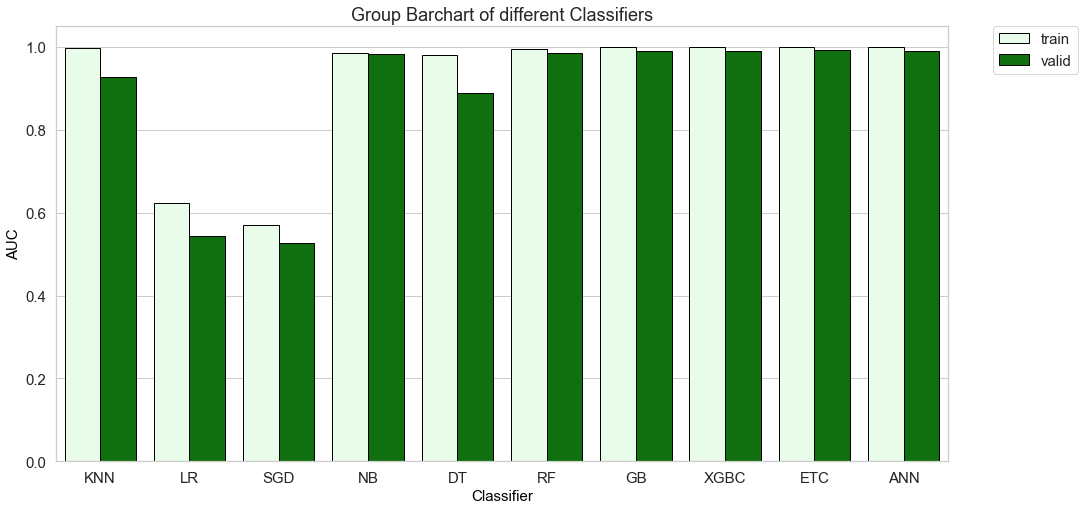

In [38]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))
ax = sns.barplot(x = 'classifier', y = 'auc',color='GREEN',edgecolor='black', hue = 'data_set', data = df_results )
ax.set_xlabel('Classifier', fontsize = 15, color = 'black')
ax.set_ylabel('AUC', fontsize = 15, color = 'black')
ax.tick_params(labelsize = 15)
#plt.bar(x = 'classifier', y = 'auc',color='pink',edgecolor='black')
#Separate legend from graph
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)
plt.title('Group Barchart of different Classifiers',fontsize=18)

In [39]:
# this is a quick way to tune one parameter of your model while holding everything else constant.
import time

my_params =  np.arange(0.05, 1.01, 0.05) # fill this in your list of parameters

# initialize arrays for storing the results
train_metrics = np.zeros(len(my_params))
valid_metrics = np.zeros(len(my_params))

# train a model for each param in a list
t1 = time.time()
for jj in range(len(my_params)):
    my_param = my_params[jj]
    
    # fit model
    model = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=my_param, min_samples_leaf=3, min_samples_split=20, n_estimators=100)
    model.fit(X_train_tf, y_train)
    # get predictions
    y_train_preds = model.predict_proba(X_train_tf)[:,1]
    y_valid_preds = model.predict_proba(X_valid_tf)[:,1]

    # calculate auc
    metric_train = roc_auc_score(y_train, y_train_preds) # fill this in
    metric_valid = roc_auc_score(y_valid, y_valid_preds) # fill this in

    # save aucs
    train_metrics[jj] = metric_train
    valid_metrics[jj] = metric_valid
    
    # print the time
    t2 = time.time()
    print(my_param, t2-t1)
    t1 = time.time()

0.05 1.6049585342407227
0.1 2.3110296726226807
0.15000000000000002 2.959463357925415
0.2 3.542976140975952
0.25 3.7328948974609375
0.3 4.425385236740112
0.35000000000000003 4.859440326690674
0.4 5.4269890785217285
0.45 6.006925582885742
0.5 7.089877605438232
0.55 7.577963829040527
0.6000000000000001 7.654960632324219
0.6500000000000001 8.232455730438232
0.7000000000000001 9.930874109268188
0.7500000000000001 10.260872840881348
0.8 10.1024329662323
0.8500000000000001 10.624866962432861
0.9000000000000001 10.973861694335938
0.9500000000000001 14.149880170822144
1.0 12.183347702026367


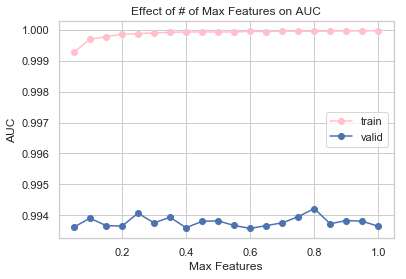

In [40]:
import matplotlib.pyplot as plt

plt.plot(my_params, train_metrics,'o-',label = 'train', color='pink')
plt.plot(my_params, valid_metrics,'o-',label = 'valid')

plt.xlabel('Max Features') # fill this in
plt.ylabel('AUC')# fill this in
plt.title('Effect of # of Max Features on AUC') # fill this in
plt.legend()
plt.show()

In [41]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    
    plt.figure(figsize=(16, 8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="pink",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="blue",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

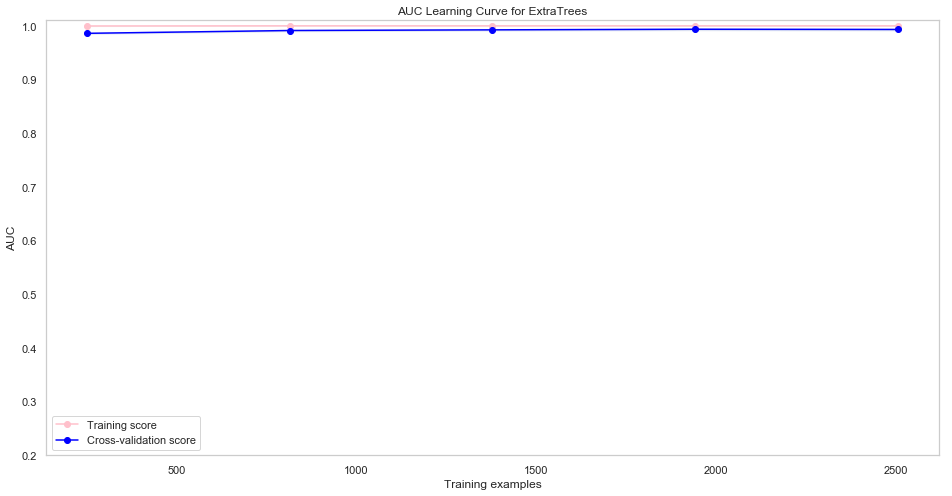

In [42]:
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.


title = 'AUC Learning Curve for ExtraTrees'                                      # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=1.0, min_samples_leaf=3, min_samples_split=20, n_estimators=100)                                      # fill this in
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)


plt.show()

In [43]:
####TPOT Library ####
feature_importances = pd.DataFrame(etc.feature_importances_,index = cols_input,columns=['importance']).sort_values('importance',ascending=False)

In [44]:
feature_importances.head()

,importance
X128,0.020076
X43,0.018282
X160,0.015381
X145,0.015165
X161,0.014911


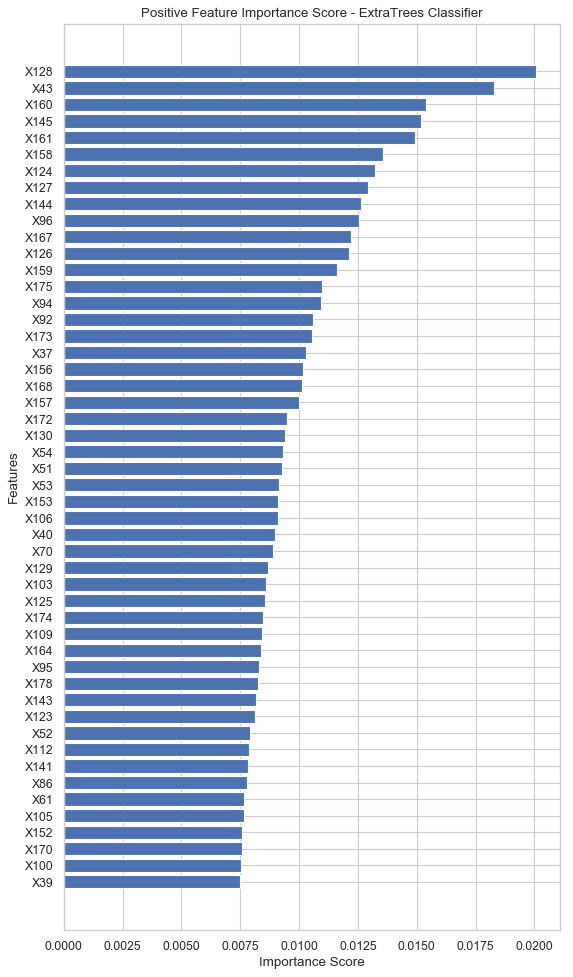

In [45]:
pos_features = feature_importances.loc[feature_importances.importance > 0]

num = np.min([50, len(pos_features)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = pos_features.iloc[:num].values.ravel()[::-1]
feature_labels = list(pos_features.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - ExtraTrees Classifier')
plt.yticks(ylocs, feature_labels)
plt.show()

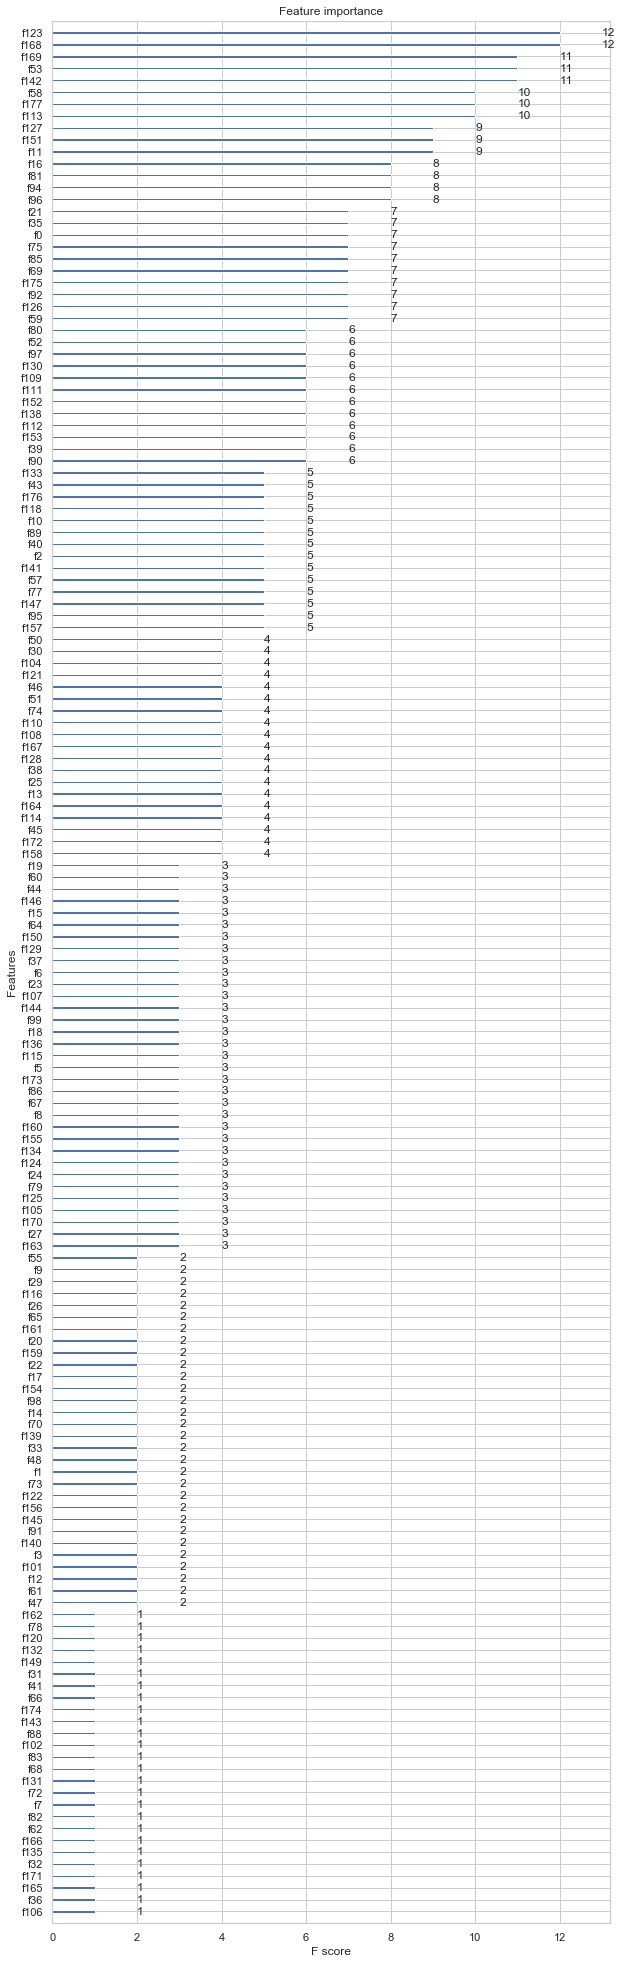

In [46]:
ax = xgb.plot_importance(xgbc)
fig = ax.figure
fig.set_size_inches(10, 35)
plt.savefig('xgbcf.png')

In [47]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model
X = df_train.drop(columns=['OUTPUT_LABEL'])
model = xgbc

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

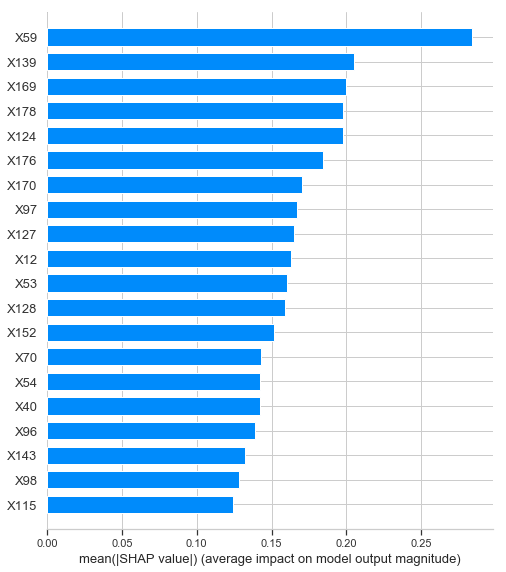

<Figure size 432x288 with 0 Axes>

In [48]:
shap.summary_plot(shap_values, X, plot_type="bar")
plt.savefig('shap.png')

In [49]:
feature_importances = pd.DataFrame(xgbc.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

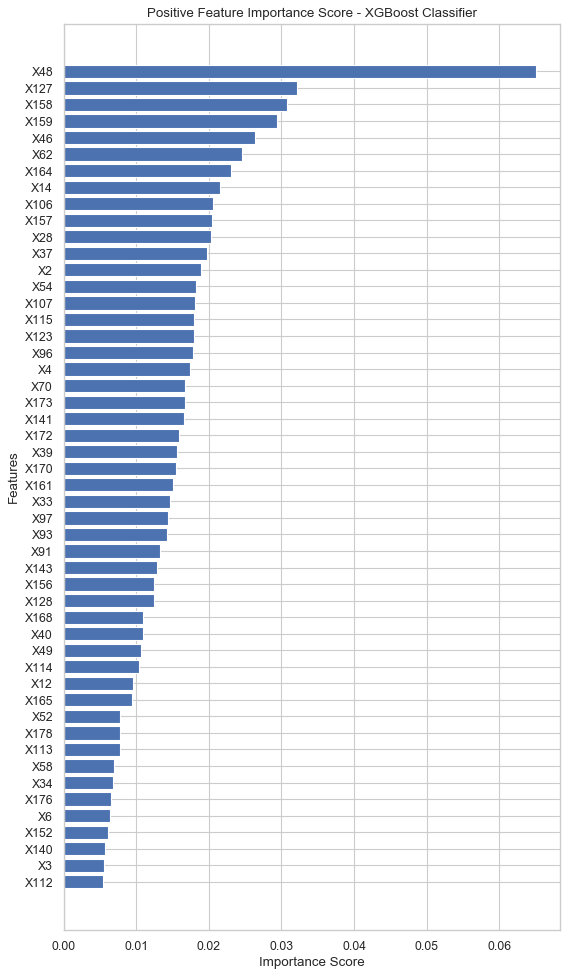

In [50]:
pos_features = feature_importances.loc[feature_importances.importance > 0]

num = np.min([50, len(pos_features)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = pos_features.iloc[:num].values.ravel()[::-1]
feature_labels = list(pos_features.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - XGBoost Classifier')
plt.yticks(ylocs, feature_labels)
plt.savefig('xgbc.png')
plt.show()

In [51]:
###HYPERPARAETER####
from dask.distributed import Client
client = Client()
client

Client Scheduler: tcp://127.0.0.1:57007 Dashboard: http://127.0.0.1:57008/status,Cluster Workers: 2 Cores: 2 Memory: 3.73 GB


In [52]:
from tpot import TPOTClassifier
import numpy as np
tpot_config = {
    'xgboost.XGBClassifier': {
        'n_estimators': [100],
        'max_depth': range(1, 11),
        'learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.],
        'subsample': np.arange(0.05, 1.01, 0.05),
        'min_child_weight': range(1, 21),
        'nthread': [1]
    },
    'sklearn.ensemble.ExtraTreesClassifier': {
        'n_estimators': [100],
        'criterion': ["gini", "entropy"],
        'max_features': np.arange(0.05, 1.01, 0.05),
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 21),
        'bootstrap': [True, False]
    }

}
pipeline_optimizer = TPOTClassifier(verbosity=2, periodic_checkpoint_folder='tpot', generations=100, population_size=100, scoring='roc_auc', use_dask=True, config_dict=tpot_config)
pipeline_optimizer.fit(X_train_tf, y_train)
print(pipeline_optimizer.score(X_valid, y_valid))
pipeline_optimizer.export('tpot_exported_pipeline.py')

RuntimeError: A pipeline has not yet been optimized. Please call fit() first.

In [53]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from sklearn.preprocessing import FunctionTransformer
from copy import copy

In [54]:
best_model = make_pipeline(
    make_union(
        FunctionTransformer(copy),
        make_union(
            make_union(
                FunctionTransformer(copy),
                make_union(
                    FunctionTransformer(copy),
                    make_union(
                        StackingEstimator(estimator=make_pipeline(
                            make_union(
                                FunctionTransformer(copy),
                                FunctionTransformer(copy)
                            ),
                            ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.1,
                                                 min_samples_leaf=10, min_samples_split=10, n_estimators=100)
                        )),
                        FunctionTransformer(copy)
                    )
                )
            ),
            FunctionTransformer(copy)
        )
    ),
    ExtraTreesClassifier(bootstrap=False, criterion="gini", max_features=0.05,
                         min_samples_leaf=2, min_samples_split=4, n_estimators=100)
)

best_model.fit(X_train_tf, y_train)

y_train_preds = best_model.predict_proba(X_train_tf)[:, 1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:, 1]

print('ExtraTrees Classifier')
print('Training:')
xgbc_train_auc, xgbc_train_accuracy, xgbc_train_recall, xgbc_train_precision, xgbc_train_specificity = print_report(
    y_train, y_train_preds, thresh)
print('Validation:')
xgbc_valid_auc, xgbc_valid_accuracy, xgbc_valid_recall, xgbc_valid_precision, xgbc_valid_specificity = print_report(
    y_valid, y_valid_preds, thresh)

ExtraTrees Classifier
Training:
AUC:1.000
accuracy:1.000
recall:1.000
precision:1.000
specificity:1.000
prevalence:0.500
 
Validation:
AUC:0.995
accuracy:0.956
recall:0.953
precision:0.840
specificity:0.957
prevalence:0.192
 


In [55]:
pickle.dump(best_model, open('best_classifier.pkl', 'wb'),protocol = 4)

In [56]:
####MODEL EVALUATION####

# load the model, columns, and scaler
best_model = pickle.load(open('best_classifier.pkl','rb'))
cols_input = pickle.load(open('cols_input.sav','rb'))
scaler = pickle.load(open('scaler.sav', 'rb'))

# load the data
df_train = pd.read_csv('df_train.csv')
df_valid= pd.read_csv('df_valid.csv')
df_test= pd.read_csv('df_test.csv')

# create X and y matrices
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values
y_test = df_test['OUTPUT_LABEL'].values

# transform our data matrices 
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

In [57]:
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

In [58]:
thresh = 0.5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,y_test_preds, thresh)

Training:
AUC:1.000
accuracy:1.000
recall:1.000
precision:1.000
specificity:1.000
prevalence:0.500
 
Validation:
AUC:0.995
accuracy:0.956
recall:0.953
precision:0.840
specificity:0.957
prevalence:0.192
 
Test:
AUC:0.994
accuracy:0.957
recall:0.965
precision:0.838
specificity:0.955
prevalence:0.194
 


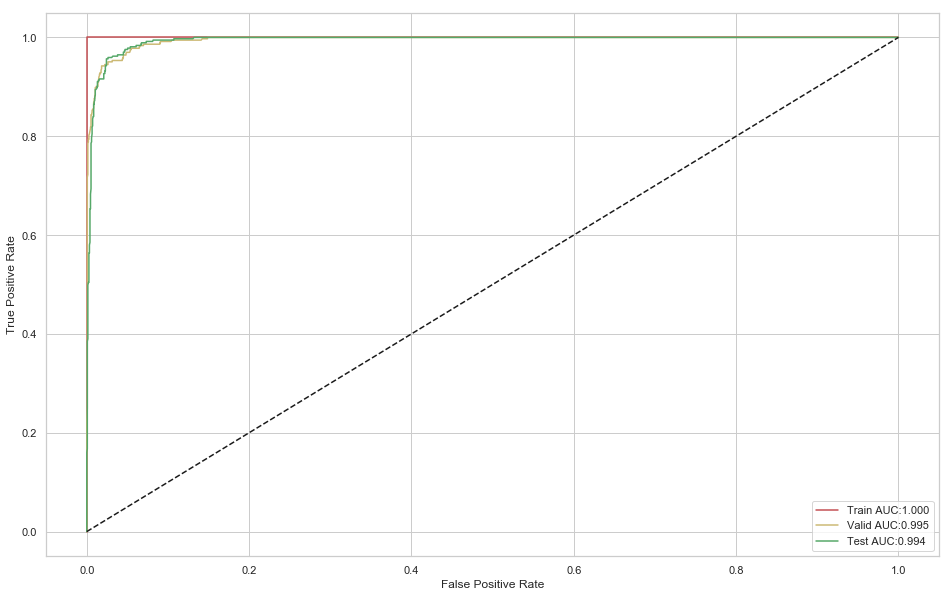

In [59]:
###ROC CURVE###
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.figure(figsize=(16,10))
plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'y-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# KNN with n=5

In [ ]:
# use numpy and pandas
import numpy as np
import pandas as pd

# We need sklearn for preprocessing and for the TSNE Algorithm.
import sklearn
from sklearn.preprocessing import Imputer, scale
from sklearn.manifold import TSNE

# WE employ a random state.
RS = 20150101

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns

# Loading the data
X = pd.read_csv('F:\\MP19\\data.csv')

print("The data has {} observations and {} features".format(X.shape[0], X.shape[1]))

# Are there null values in the dataframe?
cols_null_counts = X.apply(lambda x: sum(x.isnull()))
print('number of columns with null values:', len(cols_null_counts[cols_null_counts != 0]))

# Any non numeric datatypes?
datatypes = X.dtypes
print('datatypes that are used: ', np.unique(datatypes.values))

# only the columns of type object concerns us
print('nr of columns for dtype object: ', len(datatypes.values[datatypes.values == 'object']))
print('Columns of type object are: ', [col for col in X.columns if X[col].dtype == 'object'])
X['Unnamed: 0'].values[:10]

# We drop the 'Unnamed: 0' column, maybe it is some internal adminstrative kind of information?
X.drop('Unnamed: 0', inplace=True, axis=1)

# we transform the target into 0 or 1: 0 for normal brain and 1 for the epileptic seizure
X['y'] = X['y'].apply(lambda x: 1 if x == 1 else 0)

# now we sort for the target
X.sort_values(by='y', inplace=True)

# We split the target off the fetures and store it seperately
y = X['y']
X.drop('y', inplace=True, axis=1)
assert 'y' not in X.columns

# make sure the target is binary now
assert set(y.unique()) == {0, 1}

# we also scale the data
X = scale(X) 

# run the Algorithm
epileptic_proj = TSNE(random_state=RS).fit_transform(X)
epileptic_proj.shape

# building the scatter plot function: the target comes in as color, x is the data
def scatter(x, colors):
    """this function plots the result
    - x is a two dimensional vector
    - colors is a code that tells how to color them: it corresponds to the target
    """
    
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 2)[::-1])

    # We create a scatter plot.
    f = plt.figure(figsize=(10, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)]
                   )
    
    ax.axis('off') # the axis will not be shown
    ax.axis('tight') # makes sure all data is shown
    
    # set title
    plt.title("Epilepsy detection", fontsize=25)
    
    # legend with color patches
    epilepsy_patch = mpatches.Patch(color=palette[1], label='Epileptic Seizure')
    normal_patch = mpatches.Patch(color=palette[0], label='Normal Brain Activity')
    plt.legend(handles=[epilepsy_patch, normal_patch], fontsize=10, loc=4)

    return f, ax, sc

# Now we call the scatter plot function on our data
scatter(epileptic_proj, y)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def apply_KnearestNeighbor(X):
    # split data into train and test sets
    seed = 7
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, y,
        test_size=test_size, random_state=seed)

    # fit model no training data
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)
    print(model)

    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]

    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

    from sklearn.metrics import roc_auc_score
    roc_auc = roc_auc_score(y_test, predictions)
    print("Area Under the Receiver Operating Characteristic Curve: %.2f%%" % roc_auc)
    
apply_KnearestNeighbor(X)

apply_KnearestNeighbor(epileptic_proj)